In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# load data

In [2]:
df_ori = pd.read_csv('BBB_planA_daily.csv')

In [3]:
df = df_ori.copy()
pd.set_option('display.max_columns', None)
df

,final_result,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44,T45,T46,T47,T48,T49,T50,T51,T52,T53,T54,T55,T56,T57,T58,T59,T60,T61,T62,T63,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73,T74,T75,T76,T77,T78,T79,T80,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99,T100,T101,T102,T103,T104,T105,T106,T107,T108,T109,T110,T111,T112,T113,T114,T115,T116,T117,T118,T119,T120,T121,T122,T123,T124,T125,T126,T127,T128,T129,T130,T131,T132,T133,T134,T135,T136,T137,T138,T139,T140,T141,T142,T143,T144,T145,T146,T147,T148,T149,T150,T151,T152,T153,T154,T155,T156,T157,T158,T159,T160,T161,T162,T163,T164,T165,T166,T167,T168,T169,T170,T171,T172,T173,T174,T175,T176,T177,T178,T179,T180,T181,T182,T183,T184,T185,T186,T187,T188,T189,T190,T191,T192,T193,T194,T195,T196,T197,T198,T199,T200,T201,T202,T203,T204,T205,T206,T207,T208,T209,T210,T211,T212,T213,T214,T215,T216,T217,T218,T219,T220,T221,T222,T223,T224,T225,T226,T227,T228,T229,T230,T231,T232,T233,T234,T235,T236,T237,T238,T239,T240,T241,T242,T243,T244,T245,T246,T247,T248,T249,T250,T251,T252,T253,T254,T255,T256,T257,T258,T259,T260,T261,T262,T263,T264,T265,T266,T267,T268,id1
0,1,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,6.0,26.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,15.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,3.0,4.0,2.0,0.0,0.0,15.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,7.0,19.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,24.0,0.0,19.0,0.0,4.0,19.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0,71.0,0.0,2.0,94.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,94.0,2.0,3.0,0.0,0.0,5.0,34.0,48.0,0.0,0.0,0.0,1.0,0.0,34.0,0.0,183.0,0.0,0.0,1.0,0.0,7.0,0.0,253.0,39.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,4.0,0.0,0.0,19.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,0.

# prepare X and y

In [4]:
X = df.drop(['final_result','id1'], axis=1)
X

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40,T41,T42,T43,T44,T45,T46,T47,T48,T49,T50,T51,T52,T53,T54,T55,T56,T57,T58,T59,T60,T61,T62,T63,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73,T74,T75,T76,T77,T78,T79,T80,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99,T100,T101,T102,T103,T104,T105,T106,T107,T108,T109,T110,T111,T112,T113,T114,T115,T116,T117,T118,T119,T120,T121,T122,T123,T124,T125,T126,T127,T128,T129,T130,T131,T132,T133,T134,T135,T136,T137,T138,T139,T140,T141,T142,T143,T144,T145,T146,T147,T148,T149,T150,T151,T152,T153,T154,T155,T156,T157,T158,T159,T160,T161,T162,T163,T164,T165,T166,T167,T168,T169,T170,T171,T172,T173,T174,T175,T176,T177,T178,T179,T180,T181,T182,T183,T184,T185,T186,T187,T188,T189,T190,T191,T192,T193,T194,T195,T196,T197,T198,T199,T200,T201,T202,T203,T204,T205,T206,T207,T208,T209,T210,T211,T212,T213,T214,T215,T216,T217,T218,T219,T220,T221,T222,T223,T224,T225,T226,T227,T228,T229,T230,T231,T232,T233,T234,T235,T236,T237,T238,T239,T240,T241,T242,T243,T244,T245,T246,T247,T248,T249,T250,T251,T252,T253,T254,T255,T256,T257,T258,T259,T260,T261,T262,T263,T264,T265,T266,T267,T268
0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,6.0,26.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,15.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,3.0,4.0,2.0,0.0,0.0,15.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,19.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,24.0,0.0,19.0,0.0,4.0,19.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,71.0,0.0,2.0,94.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,94.0,2.0,3.0,0.0,0.0,5.0,34.0,48.0,0.0,0.0,0.0,1.0,0.0,34.0,0.0,183.0,0.0,0.0,1.0,0.0,7.0,0.0,253.0,39.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,1.0,6.0,0.0,0.0,4.0,0.0,0.0,19.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [5]:
y = df['final_result']
y

0       1
1       1
2       0
3       1
4       0
       ..
5336    1
5337    0
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64

In [6]:
# convert to numpy array
X = X.values
y = y.values

In [7]:
type(X)

numpy.ndarray

In [9]:
type(y)

numpy.ndarray

In [32]:
X_train1, X_test1, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 269)
(1603, 269)
(3738,)
(1603,)


In [34]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train1)
X_test = min_max_scaler.fit_transform(X_test1)

In [36]:
# reshape into correct dimensions to input into cnn
X_train = X_train.reshape(3738,269,1)
X_test = X_test.reshape(1603,269,1)

# build CNN model

In [37]:
tf.random.set_seed(42)

In [38]:
X_train.shape[1:]

(269, 1)

In [ ]:
batch_size = 128

In [66]:
##
lr=0.0001 
epochs = 200
model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4133 - accuracy: 0.8596 (lr=0.0001, epochs = 200)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4707 - accuracy: 0.7024 (lr=0.00001, epochs = 100) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4074 - accuracy: 0.8702 (lr=0.0001, epochs = 100) --> best

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4470 - accuracy: 0.8578 (lr=0.001, epochs = 100) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 1.0270 - accuracy: 0.8415 (lr=0.01, epochs = 100) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

# fit CNN model

In [67]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 134, 64)           256       
                                                                 
 activation_8 (Activation)   (None, 134, 64)           0         
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 67, 64)           0         
 1D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 67, 64)            0         
                                                                 
 flatten_8 (Flatten)         (None, 4288)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 4289      
                                                      

In [68]:
history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/200
117/117 [==============================] - 2s 11ms/step - loss: 0.6603 - accuracy: 0.6755 - val_loss: 0.6057 - val_accuracy: 0.7024
Epoch 2/200
117/117 [==============================] - 1s 9ms/step - loss: 0.5887 - accuracy: 0.7025 - val_loss: 0.5704 - val_accuracy: 0.7024
Epoch 3/200
117/117 [==============================] - 1s 9ms/step - loss: 0.5725 - accuracy: 0.7025 - val_loss: 0.5589 - val_accuracy: 0.7024
Epoch 4/200
117/117 [==============================] - 1s 9ms/step - loss: 0.5620 - accuracy: 0.7025 - val_loss: 0.5452 - val_accuracy: 0.7024
Epoch 5/200
117/117 [==============================] - 1s 9ms/step - loss: 0.5500 - accuracy: 0.7025 - val_loss: 0.5315 - val_accuracy: 0.7024
Epoch 6/200
117/117 [==============================] - 1s 9ms/step - loss: 0.5376 - accuracy: 0.7025 - val_loss: 0.5175 - val_accuracy: 0.7024
Epoch 7/200
117/117 [==============================] - 1s 9ms/step - loss: 0.5255 - accuracy: 0.7025 - val_loss: 0.5057 - val_accuracy: 0.702

Epoch 58/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4174 - accuracy: 0.8745 - val_loss: 0.4099 - val_accuracy: 0.8777
Epoch 59/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4171 - accuracy: 0.8740 - val_loss: 0.4098 - val_accuracy: 0.8771
Epoch 60/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4182 - accuracy: 0.8737 - val_loss: 0.4097 - val_accuracy: 0.8759
Epoch 61/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4179 - accuracy: 0.8748 - val_loss: 0.4095 - val_accuracy: 0.8765
Epoch 62/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4160 - accuracy: 0.8748 - val_loss: 0.4098 - val_accuracy: 0.8765
Epoch 63/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4161 - accuracy: 0.8743 - val_loss: 0.4101 - val_accuracy: 0.8752
Epoch 64/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4153 - accuracy: 0.8737 - val_loss: 0.4093 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4030 - accuracy: 0.8756 - val_loss: 0.4076 - val_accuracy: 0.8684
Epoch 116/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4028 - accuracy: 0.8753 - val_loss: 0.4081 - val_accuracy: 0.8690
Epoch 117/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4015 - accuracy: 0.8751 - val_loss: 0.4078 - val_accuracy: 0.8677
Epoch 118/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4004 - accuracy: 0.8775 - val_loss: 0.4082 - val_accuracy: 0.8702
Epoch 119/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4009 - accuracy: 0.8740 - val_loss: 0.4079 - val_accuracy: 0.8677
Epoch 120/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4012 - accuracy: 0.8748 - val_loss: 0.4078 - val_accuracy: 0.8677
Epoch 121/200
117/117 [==============================] - 1s 9ms/step - loss: 0.4014 - accuracy: 0.8751 - val_loss: 0.4080 - val_ac

117/117 [==============================] - 1s 9ms/step - loss: 0.3933 - accuracy: 0.8748 - val_loss: 0.4111 - val_accuracy: 0.8628
Epoch 172/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3908 - accuracy: 0.8753 - val_loss: 0.4114 - val_accuracy: 0.8628
Epoch 173/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3906 - accuracy: 0.8767 - val_loss: 0.4117 - val_accuracy: 0.8634
Epoch 174/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3894 - accuracy: 0.8751 - val_loss: 0.4116 - val_accuracy: 0.8628
Epoch 175/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3910 - accuracy: 0.8764 - val_loss: 0.4121 - val_accuracy: 0.8634
Epoch 176/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3928 - accuracy: 0.8740 - val_loss: 0.4124 - val_accuracy: 0.8640
Epoch 177/200
117/117 [==============================] - 1s 9ms/step - loss: 0.3907 - accuracy: 0.8743 - val_loss: 0.4117 - val_accuracy: 0.8615

In [69]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8596


[0.4133429527282715, 0.8596381545066833]

# plot CNN learning process

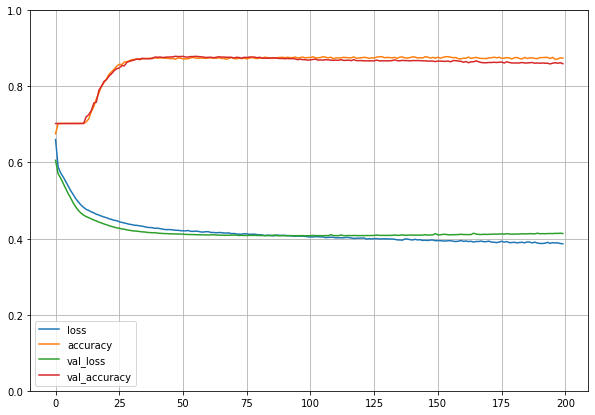

In [70]:
import pandas as pd

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## loss: 0.6095 - accuracy: 0.7025 (lr=0.1)

model = Sequential()
model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4167 - accuracy: 0.8616 (lr=0.01) --> best

model = Sequential()
model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

##  loss: 0.4291 - accuracy: 0.8597 (lr=0.001)

model = Sequential()
model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4173 - accuracy: 0.8475 (lr=0.0001)

model = Sequential()
model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])
